# Análise de dados e classificador de gênero

Autor: Bernardo Cassimiro Fonseca de Oliveira

Neste arquivo, é desenvolvida uma análise dos dados dentro do contexto do processo seletivo da Portal. O objetivo aqui, além da análise, é a criação de uma ferramenta de classificação de gênero baseada nesses dados.

Primeiramente, uma descrição rápida sobre os dados recebidos e sobre as ferramentas empregadas é feita. Após isso, a cada iteração do desenvolvimento da análise e do classificador, comentários são feitos em relação a escolhas e aos resultados obtidos.

## Descrição dos dados

- `age`: em anos, em números inteiros
- `sex`: M = masculino e F = feminino, em strings
- `cp`: tipo de dor no peito, em categorias
- `trestbps`: pressão sanguínua em repouso em mmHg, em números inteiros 
- `chol`: colesterol em mg/dl, em números reais
- `fbs`: açúcar no sangue maior que 120 mg/dl, binário
- `restecg`: resultado do eletrocardiograma, em números reais
- `thalach`: número máximo de batimentos cardíacos, em números inteiros
- `nar`: número de braços, em números inteiros
- `exang`: angina induzida por exercícios, binário
- `oldpeak`: depressão ST, em números reais
- `slope`: supradesnivelamento de segmento ST, em números reais
- `hc`: cor do cabelo, em categorias
- `sk`: cor da pele, em categorias
- `trf`: tempo gasto no trânsito diariamente, em segundos, em números reais
- `ca`: número de veias em exame de fluroscopia, em números inteiros
- `thal`: 3 = normal; 6 = defeito; 7 = reversable defect

Primeiramente, é possível se notar a heterogeneidade dos dados, os quais incluem fatores como a cor do cabelo que, a princípio, não deveriam influenciar significativamente no desempenho de um classificador de gênero. No entanto, é importante colocar que quaisquer informações dos dados podem vim a ser relevantes para a amostra com a qual se trabalha. Mais a frente, será medida a correlação entre gênero e o restante dos dados para se avaliar a relação entre eles.



## Análise dos dados

O arquivo com os dados será carregado na próxima célula. 

In [1]:
import pandas as pd

dadosPATH = './test_data_CANDIDATE.csv'            # Define o nome do arquivo que contém os dados
dadosFRAME = pd.read_csv(dadosPATH, index_col=0)   # Lê o arquivo contendo os dados
dadosFRAME.head(n=15)                              # Mostra as quinze primeiras linhas do arquivo carregado

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
index,,,,,,,,,,,,,,,,,
0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145
5,51,F,10000,140,299.0,0,1,173,1,1.6,2.0,0,3,2,0,0,3267.628751
6,58,F,10000,120,284.0,0,0,160,0,1.8,1.0,0,2,2,0,0,6556.847684
7,58,F,10000,125,220.0,0,1,144,0,0.4,NaN,4,3,2,1,1,5120.660542
8,47,F,10000,112,204.0,0,1,143,0,0.1,NaN,0,2,2,0,1,6540.095874


Algumas avaliações podem ser feitas já com essa primeira visualização:

- A coluna `cp` não apresenta variações nos quinze primeiros itens, o que nos leva à necessidade de se verificar a quantidade de elementos únicos em cada coluna. Se há uma coluna com somente um elemento único, certamente essa coluna pode ser desconsiderada para o treinamento do classificador, pois sua existência não contribui para a inferência do gênero.

- A coluna `slope` apresenta vários NaNs já nos primeiros quinze elementos. `NaN` em pequena quantidade podem ser substituídos pelo elemento mais frequente de uma distribuição de dados sem afetar significativamente sua função densidade de probabilidade para um determinada nível de confiança. Quando há uma maior frequência desses valores, a própria coluna pode ser pouco significativa para a inferência feita pelo classificador. Assim, a quantidade de `NaN` precisa ser verificada, substituindo elementos em colunas quando a frequência de `NaN` for pequena e eliminando a coluna da análise se a frequência de `NaN` for grande. Um limite de 10% para a quantidade de linhas contendo NaN em uma única coluna foi arbitrado para a remoção da coluna.


Uma função foi desenvolvida então para realizar as seguintes ações:

- verificar a quantidade de dados únicos em cada coluna;
- verificar a existência de `NaN`;
- verificar a quantidade de `NaN`;
- eliminar colunas em que o número de NaNs é maior que o limite estabelecido;
- substituir em cada coluna `NaN` pela sua moda, se o número de `NaN` é menor que o limite estabelecido;
- eliminar colunas em que só há um elemento;
- e na coluna `sex` garantir que os gêneros estão em caracteres maiúsculos.

In [2]:
dadosFRAMEisnanLIMIT = int(len(dadosFRAME)*0.1)    # Define um limite de 10% para a quantidade de linhas contendo NaN em um coluna.
print('Número máximo de elementos numa coluna que pode ser NaN: ', dadosFRAMEisnanLIMIT)

Número máximo de elementos numa coluna que pode ser NaN:  28


In [3]:
import numpy as np

def dataFiltering(dadosFRAME,columnNAME,dadosFRAMEisnanLIMIT):
    if dadosFRAME[columnNAME].dtypes == 'O':
        dadosFRAME[columnNAME] = dadosFRAME[columnNAME].str.upper()     # Torna as letras maiúsculas em strings.
    uniqueDATA = dadosFRAME[columnNAME].unique()                        # Cria um vetor de dados únicos
    LENGTHuniqueDATA = len(uniqueDATA)                                  # Verifica a quantidade de dados únicos
    FREQUENCYuniqueDATA = dadosFRAME[columnNAME].value_counts()         # Verifica a distribuição de dados únicos
    isnanDATA = dadosFRAME[columnNAME].isna()                           # Verifica NaNs
    FREQUENCYisnanDATA = isnanDATA.sum()                                # Conta a quantidade de NaNs
    
    if FREQUENCYisnanDATA > 0:                                          # Caso exista NaNs em valor maior que o limite de 10% dos dados, deleta a coluna, pois seus dados não contribuem para a predição.
        if FREQUENCYisnanDATA > dadosFRAMEisnanLIMIT:
            dadosFRAME = dadosFRAME.drop(columns=[columnNAME], axis=1)
        else:                                                           # Caso exista NaNs em valor menor que o limite de 10% dos dados, substitui pela moda da coluna. Solução adotada pois há poucos dados. Tendo mais dados, as linhas com NaNs seriam desprezadas.
            auxMODE = dadosFRAME[columnNAME].mode()
            dadosFRAME[columnNAME].fillna(auxMODE[0],inplace=True)  
    
    if LENGTHuniqueDATA == 1:                                           # Deleta colunas com dados sem variabilidade, tendo em vista que eles certamente não contribuem para a predição.
        dadosFRAME = dadosFRAME.drop(columns=[columnNAME], axis=1)
    
    return dadosFRAME, FREQUENCYuniqueDATA, LENGTHuniqueDATA, FREQUENCYisnanDATA

Aplicando essa função aos dados, temos não somente a limpeza da váriável de dados `dadosFRAME` como também a extração de alguns parâmetros interessantes para a análise.

In [4]:
for label in list(dadosFRAME):
    if label == 'age':
        dadosFRAME, FREQUENCYuniqueRAW, LENGTHunique, FREQUENCYisnan = dataFiltering(dadosFRAME, label, dadosFRAMEisnanLIMIT)
    else:
        dadosFRAME, auxFREQUENCYunique, auxLENGTHunique, auxFREQUENCYisnan = dataFiltering(dadosFRAME, label, dadosFRAMEisnanLIMIT)
        FREQUENCYuniqueRAW = pd.concat([FREQUENCYuniqueRAW,auxFREQUENCYunique], axis=1)
        LENGTHunique = np.append(LENGTHunique,auxLENGTHunique)
        FREQUENCYisnan = np.append(FREQUENCYisnan,auxFREQUENCYisnan)
        
print('Verificando a quantidade de dados únicos por coluna: ', LENGTHunique)
print('Verificando a quantidade de NaNs por coluna: ', FREQUENCYisnan)

Verificando a quantidade de dados únicos por coluna:  [ 41   2   1  48 150   2   3  90   2  40   4   5   4   3   3   4 288]
Verificando a quantidade de NaNs por coluna:  [  0   0   0   0  16   0   0   0   0   0 143   0   0   0   0   0   0]


Vemos primeiramente que a coluna `cp` de fato tem somente um elemento único, de maneira que ela pode ser eliminada para a construção do dataset que será utilizado no treinamento.

Tem-se ainda que a coluna `chol` tem um número de `NaN` pequeno, abaixo do nível arbitrado como limite, de forma que essas ocorrência podem ser substituídas pelo elemento mais frequente da distribuição da coluna.

Por fim, a coluna `slope` tem 143 `NaN`, quase a metade das linhas, justificando sua exclusão.

Uma amostra dos dados filtrados é exibida abaixo.

In [5]:
dadosFRAME.head(n=15)                              # Mostra as quinze primeiras linhas do arquivo carregado

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
index,,,,,,,,,,,,,,,
0,49,M,130,269.0,0,1,163,0,0.0,0,2,2,0,1,6797.761892
1,61,F,138,166.0,0,0,125,1,3.6,1,2,2,1,3,4307.686943
2,46,F,140,311.0,0,1,120,1,1.8,2,3,2,0,1,4118.077502
3,69,F,140,254.0,0,0,146,0,2.0,3,3,2,1,0,7170.849469
4,51,F,100,222.0,0,1,143,1,1.2,0,2,2,1,0,5579.040145
5,51,F,140,299.0,0,1,173,1,1.6,0,3,2,0,0,3267.628751
6,58,F,120,284.0,0,0,160,0,1.8,0,2,2,0,0,6556.847684
7,58,F,125,220.0,0,1,144,0,0.4,4,3,2,1,1,5120.660542
8,47,F,112,204.0,0,1,143,0,0.1,0,2,2,0,1,6540.095874


Uma análise especialmente interessante dos dados é o desbalanceamento de classes da feature `sex`. Essa diferença entre as classes em geral é prejudicial para as ferramentas de classificação. No entanto, parâmetros podem ser escolhidos de forma a tentar contornar esse problema.

In [6]:
print(FREQUENCYuniqueRAW['sex'].dropna())

F    196.0
M     92.0
Name: sex, dtype: float64


Há ainda mais uma etapa de análise e aplicação de filtros para preparação de um dataset para o classificador de gêneros. Existem diversas ferramentas para verificar a relevância que a variação de cada coluna tem em relação ao gênero presente em sua linha. Como a quantidade de dados é pequena em relação ao número de features (288 linhas x 14 features), uma análise linear da correlação pode nos dar uma ideia melhor da relação entre cada informação presente nos dados. Idealmente, um teste de hipóteses seria mais interessantes para se verificar a relação entre as variáveis, visto que nesse grupo há ferramentas que podem lidar melhor com não linearidades. No entanto, esses testes tipicamente exigem uma interação de todos os níveis de todos os fatores para funcionar. É possível utilizar esses testes individualmente para cada variável, contudo isso não resulta de fato numa diferença real entre os fatores porque considera para cada análise que os fatores restantes permaneceram inalterados.

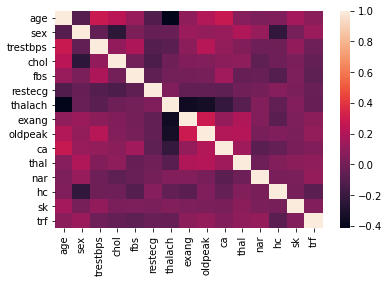

In [7]:
import seaborn as sns

dadosFORcorr = dadosFRAME
dadosFORcorr['sex'] = dadosFORcorr['sex'] == 'F'      # Transforma as strings em Booleanos.
dadosFORcorr['sex'] = dadosFORcorr['sex'].astype(int) # Transforma as strings em dados numéricos.
auxCORR = dadosFRAME.corr()                           # Calcula a correlação. Com mais dados seria possível eliminar colunas com testes de hipótese, o que seria melhor para se atribuir um grau de confiabilidade.
SEXcorr = auxCORR['sex'].abs()                        # Retorna a correlação absoluta em relação à coluna 'sex'.

sns.heatmap(auxCORR, 
            xticklabels=auxCORR.columns,
            yticklabels=auxCORR.columns)

In [8]:
print('Correlação absoluta relacionada a feature sex: ')
print(SEXcorr)

Correlação absoluta relacionada a feature sex: 
age         0.095453
sex         1.000000
trestbps    0.057594
chol        0.248603
fbs         0.029891
restecg     0.044233
thalach     0.034308
exang       0.127497
oldpeak     0.106737
ca          0.122047
thal        0.203524
nar         0.117275
hc          0.229155
sk          0.011688
trf         0.131944
Name: sex, dtype: float64


A feature `sex` tem maior correlação absoluta com `chol`, `exang`, `oldpeak`, `ca`, `thal`, `nar`, `hc` e `trf`. Esses são os parâmetros que vão influenciar mais no treinamento da ferramenta de predição. Em tese, esse parâmetros poderiam ser os únicos a serem utilizados numa ferramenta de classificação. Contudo, como a correlação absoluta delas não é fortemente maior do que das outras e possivelmente issonão será significativo no tempo de treinamento, pela quantidade de dados, optou-se por manter os dados em `dadosFORcorr` para o treinamento.

## Classificador de gêneros

Não existe uma ferramenta de classificação mágica, que funcione bem para todas as aplicações. Nesse sentido, é necessário se testar para cada situação um conjunto de ferramentas e verificar então qual apresenta melhor desempenho. As ferramentas escolhidas são:

- Support Vector Machine (SVM)
- Random Forest (RF)
- Light Gradient Boosted Machine (LGBM)
- Multi-layer Perceptron (MLP) da biblioteca Sklearn

Além disso, uma pipeline com Randomized Search foi também utilizada para se testar diversos parâmetros de ferramentas, se chegando a uma configuração semi-otimizada.

É importante salientar que a tarefa de classificação tende a ser mais simples quanto maior for a razão entre número de observações sobre o número de features utilizadas. No presente caso, essa relação não é muito favorável, de maneira que será complexo encontrar um classificador com alta acurácia no teste sem que ele tenha a tendência ao overfitting.

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC                                 # SVM

from sklearn.ensemble import RandomForestClassifier         # RF

from lightgbm import LGBMClassifier                         # LGBM

from sklearn.neural_network import MLPClassifier            # MLP - Sklearn

seed = 17

def classifierTool(pipeSTEPS, parameterRANGE, Xtrain, Ytrain, Xtest, Ytest):
    pipelineDATA = Pipeline(pipeSTEPS)
    classTOOL = RandomizedSearchCV(pipelineDATA, param_distributions = parameterRANGE, cv=4, n_iter = 20, verbose=0, n_jobs=-1, random_state=seed)
    classTOOL.fit(Xtrain,Ytrain)
    YpredTRAIN = classTOOL.predict(Xtrain)
    COUNTmatchesTRAIN = YpredTRAIN == Ytrain
    correctMATCHEStrain = np.count_nonzero(COUNTmatchesTRAIN)
    accRESULTtrain = correctMATCHEStrain * 100.0 / len(YpredTRAIN)
    Ypred = classTOOL.predict(Xtest)
    COUNTmatches = Ypred == Ytest
    correctMATCHES = np.count_nonzero(COUNTmatches)
    accRESULT = correctMATCHES * 100.0 / len(Ypred)
    bestPARAMETERS = classTOOL.best_params_
    
    return YpredTRAIN, accRESULTtrain, Ypred, accRESULT, bestPARAMETERS, classTOOL

Abaixo os dados da `dadosFORcorr` foram divididos nas entradas e saídas do conjunto de treino dos classificadores e do conjunto de testes para avaliação das suas capacidades de generalização.

Os dados presentes em cada coluna foram normalizados a fim de facilitar o processo de treinamento.

Um valor igual a 20% das observações foi arbitrada para o conjunto de testes. Essa proporção pode ser diferente dependendo da quantidade de dados, da quantidade de features e das ferramentas a serem testadas.

In [10]:
Xdata = dadosFORcorr.drop(columns=['sex'], axis=1)
Xnorm = sklearn.preprocessing.minmax_scale(Xdata, feature_range=(0, 1), axis=0, copy=True)
Xnorm
Ynorm = dadosFORcorr['sex']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xnorm, Ynorm, test_size = 0.20, shuffle=True, random_state=seed)

### SVM

Para SVM, foram utilizados diferentes valores para as variáveis: (1) parâmetro de regularização, (2) coeficiente gama do kernel e (3) tipo de kernel utilizado pela ferramenta. O balanceamento do peso das classes foi setado como balanceado tendo em vista que há uma diferença substancial entre o número de ocorrências do gênero `F` e `M` no dataset. 

Acurácia do treino com SVM em %:  100.0
Acurácia do teste com SVM em %:  68.96551724137932
Parâmetros resultantes do Randomized Search com SVM:  {'clf__kernel': 'rbf', 'clf__gamma': 10, 'clf__class_weight': 'balanced', 'clf__C': 1000}
 
Matriz de confusão do teste com SVM: 


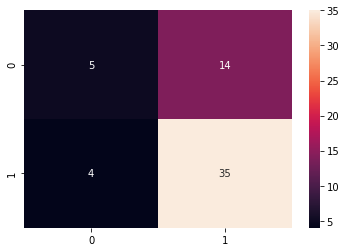

In [11]:
np.random.seed(seed)
pipeSTEPS = [('scaler',preprocessing.MinMaxScaler()), ('clf',SVC(random_state=seed))]
parameterRANGE = {
                    'clf__C': [0.1, 0.5, 1, 10, 50, 100, 1000],
                    'clf__gamma': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'clf__class_weight': ['balanced']
                    }

YpredTRAINsvm, accRESULTtrainSVM, YpredSVM, accRESULTsvm, bestPARAMSsvm, classTOOLsvm = classifierTool(pipeSTEPS, parameterRANGE, Xtrain, Ytrain, Xtest, Ytest)

print('Acurácia do treino com SVM em %: ', accRESULTtrainSVM)

print('Acurácia do teste com SVM em %: ', accRESULTsvm)

print('Parâmetros resultantes do Randomized Search com SVM: ', bestPARAMSsvm)

print(' ')
print('Matriz de confusão do teste com SVM: ')
sns.heatmap(confusion_matrix(Ytest,YpredSVM), annot=True)

a = 1

SVM resultou numa acurácia de {{accRESULTtrainSVM}}% no treino e de {{accRESULTsvm}}% no teste. A diferença grande entre o resultado para o treinamento e para o teste indica grande probabilidade de overfitting.

Majoritariamente a SVM apresentou falsos positivos nas indicações erradas, o que no caso desse problema significa falsas indicações de gênero `F`. Dependendo da aplicação, falsos positivos ou falsos negativos podem ser mais ou menos significativos.


### RF

Para RF, foram exploradas as seguintes variáveis: (1) o número de árvores na floresta, (2) a função utilizada para medir a qualidade da divisão entre ramos, (3) a profundidade máxima das árvores, (4) o número de features utilizadas para encontrar a melhor divisão entre ramos, (5) o número mínimo de amostras necessário para estar num nó de uma folha e (6) o número mínimo de amostras necessário para dividir um nó interno. O balanceamento do peso das classes também foi setado como balanceado, como na SVM. Outras váriaveis têm valor fixo graças ao baixo número de dados para o treinamento.

Acurácia do treino com RF em %:  97.82608695652173
Acurácia do teste com RF em %:  72.41379310344827
Parâmetros resultantes do Randomized Search com RF:  {'clf__warm_start': False, 'clf__verbose': 0, 'clf__random_state': None, 'clf__n_estimators': 1400, 'clf__min_weight_fraction_leaf': 0.0, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__min_impurity_split': None, 'clf__min_impurity_decrease': 0.0, 'clf__max_samples': None, 'clf__max_leaf_nodes': None, 'clf__max_features': 'sqrt', 'clf__max_depth': 49, 'clf__criterion': 'entropy', 'clf__class_weight': 'balanced', 'clf__ccp_alpha': 0.0, 'clf__bootstrap': True}
 
Matriz de confusão do teste com RF: 


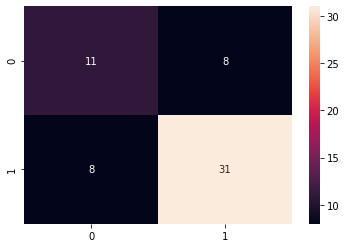

In [12]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(seed)
pipeSTEPS = [('scaler',preprocessing.MinMaxScaler()), ('clf',RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=seed))]
parameterRANGE = {
                    'clf__max_depth': [49],
                    'clf__max_leaf_nodes': [None],
                    'clf__max_samples': [None],
                    'clf__max_features': ['sqrt'],
                    'clf__min_impurity_decrease': [0.0],
                    'clf__min_impurity_split': [None],
                    'clf__min_samples_leaf': [1],
                    'clf__min_samples_split': [10],
                    'clf__min_weight_fraction_leaf': [0.0],
                    'clf__n_estimators': [200, 800, 1400, 2000, 2600, 3200, 3800],
                    'clf__random_state': [None],
                    'clf__verbose': [0],
                    'clf__warm_start': [False],
                    'clf__bootstrap': [True],
                    'clf__ccp_alpha': [0.0],
                    'clf__criterion': ['entropy'],
                    'clf__class_weight': ['balanced']
                    } 

YpredTRAINrf, accRESULTtrainRF, YpredRF, accRESULTrf, bestPARAMSrf, classTOOLrf = classifierTool(pipeSTEPS, parameterRANGE, Xtrain, Ytrain, Xtest, Ytest)

print('Acurácia do treino com RF em %: ', accRESULTtrainRF)

print('Acurácia do teste com RF em %: ', accRESULTrf)

print('Parâmetros resultantes do Randomized Search com RF: ', bestPARAMSrf)

print(' ')
print('Matriz de confusão do teste com RF: ')
sns.heatmap(confusion_matrix(Ytest,YpredRF), annot=True)

RF resultou numa acurácia de {{accRESULTtrainRF}}% no treino e de {{accRESULTrf}}% no teste, desempenho superior em relação à SVM graças ao resultado com o conjunto de testes. Como para a SVM, há um potencial overffiting da ferramenta, visto a diferença entre as acurácias de treino e teste. 


### LGBM

Para LGBM, foram exploradas as seguintes variáveis: (1) número de estimadores, (2) taxa de aprendizagem, (3) números de iterações, (4) número de folhas, (5) número de bins, (6) existência de subamostragem, (7) frequência da subamostragem e (8) magnitude da regularização.

O balanceamento do peso das classes também foi setado como balanceado, como na SVM e na RF.

Acurácia do treino com LGBM em %:  78.69565217391305
Acurácia do teste com LGBM em %:  72.41379310344827
Parâmetros resultantes do Randomized Search com LGBM:  {'clf__subsample_freq': 1, 'clf__subsample': 0.6, 'clf__reg_lambda': 0.0001, 'clf__num_leaves': 8, 'clf__num_iterations': 1000, 'clf__n_estimators': 8, 'clf__max_bin': 64, 'clf__learning_rate': 0.001, 'clf__is_unbalance': True}
 
Matriz de confusão do teste com LGBM: 


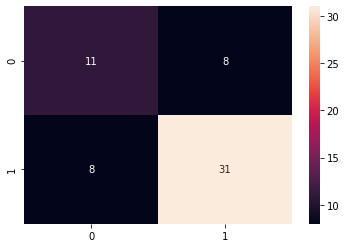

In [13]:
np.random.seed(seed)
pipeSTEPS = [('scaler',preprocessing.MinMaxScaler()),
             ('clf',LGBMClassifier(random_state=seed))]
parameterRANGE = {
                    'clf__n_estimators': np.arange(2, 10, 2),
                    'clf__learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
                    'clf__num_iterations': [50, 100, 200, 500, 1000, 5000],
                    'clf__num_leaves': [4, 8, 16, 32, 64, 128, 256, 512, 1024],
                    'clf__max_bin': [4, 8, 16, 32, 64, 128, 256],
                    'clf__subsample': np.arange(0.5, 1.0, 0.1),
                    'clf__subsample_freq': [1, 2, 4, 8, 16, 32, 64, 128, 256],
                    'clf__reg_lambda': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0],
                    'clf__is_unbalance': [True]
                    }

YpredTRAINlgbm, accRESULTtrainLGBM, YpredLGBM, accRESULTlgbm, bestPARAMSlgbm, classTOOLlgbm = classifierTool(pipeSTEPS, parameterRANGE, Xtrain, Ytrain, Xtest, Ytest)

print('Acurácia do treino com LGBM em %: ', accRESULTtrainLGBM)

print('Acurácia do teste com LGBM em %: ', accRESULTlgbm)

print('Parâmetros resultantes do Randomized Search com LGBM: ', bestPARAMSlgbm)

print(' ')
print('Matriz de confusão do teste com LGBM: ')
sns.heatmap(confusion_matrix(Ytest,YpredLGBM), annot=True)

LGBM resultou numa acurácia de {{accRESULTtrainLGBM}}% no treino e de {{accRESULTlgbm}}% no teste, desempenho superior em relação à SVM e similar à RF, considerando os resultados com os respectivos conjuntos de testes. LGBM pode ser considerado como mais apropriado que SVM e RF porque o resultado do treino e do teste foram próximos, de maneira que possivelmente não houve overfitting e assim quaisquer aprimoramentos no treino possivelmente resultarão em aprimoramentos na acurácia do treino.


### MLP

Para MLP, foram exploradas as seguintes variáveis: (1) o algoritmo de otimização, (2) tamanho das camadas escondidas (internas), (3) o valor do parâmetro de regularização, (4) a taxa de aprendizado, (5) a função de ativação, (6) a existência de parada numa situação em que a pontuação da validação se manter inalterada e (7) a proporção do conjunto de validação.

Acurácia do treino com MLP em %:  68.26086956521739
Acurácia do teste com MLP em %:  67.24137931034483
Parâmetros resultantes do Randomized Search com MLP:  {'clf__validation_fraction': 0.05, 'clf__solver': 'adam', 'clf__learning_rate': 'adaptive', 'clf__hidden_layer_sizes': (120, 120, 120), 'clf__early_stopping': True, 'clf__alpha': 0.0005, 'clf__activation': 'tanh'}
 
Matriz de confusão do teste com MLP: 


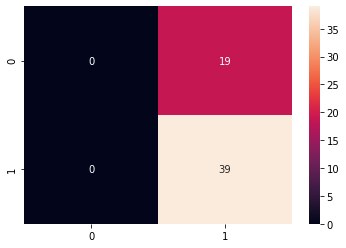

In [14]:
np.random.seed(seed)
pipeSTEPS = [('scaler',preprocessing.MinMaxScaler()),
             ('clf',MLPClassifier(random_state=seed))]
parameterRANGE = {
                    'clf__solver': ['sgd', 'adam', 'lbfgs'],
                    'clf__hidden_layer_sizes': [(5,5,5), (10,10,10), (20,20,20), (40,40,40), (80,80,80), (120,120,120)],
                    'clf__alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
                    'clf__learning_rate': ['constant','adaptive'],
                    'clf__activation': ['relu', 'tanh'],
                    'clf__early_stopping': [True],
                    'clf__validation_fraction': [0.05, 0.1, 0.15, 0.2]
                    }

YpredTRAINmlp, accRESULTtrainMLP, YpredMLP, accRESULTmlp, bestPARAMSmlp, classTOOLmlp = classifierTool(pipeSTEPS, parameterRANGE, Xtrain, Ytrain, Xtest, Ytest)

print('Acurácia do treino com MLP em %: ', accRESULTtrainMLP)

print('Acurácia do teste com MLP em %: ', accRESULTmlp)

print('Parâmetros resultantes do Randomized Search com MLP: ', bestPARAMSmlp)

print(' ')
print('Matriz de confusão do teste com MLP: ')
sns.heatmap(confusion_matrix(Ytest,YpredMLP), annot=True)

MLP resultou numa acurácia de {{accRESULTtrainMLP}}% no treino e de {{accRESULTmlp}}% no teste, resultado similar ao do SVM no teste, porém sem overfitting. É possível que a quantidade de dados tenha sido a causa desse resultado, tendo em vista que tipicamente essa ferramenta depende de mais dados para funcionar bem.


## Considerações finais

Abaixo são mostrados novamente os resultados obtidos com as ferramentas de classificação propostas.

In [15]:
print('Acurácia do treino com SVM em %: ', accRESULTtrainSVM)
print('Acurácia do teste com SVM em %: ', accRESULTsvm)
print(' ')
print('Acurácia do treino com RF em %: ', accRESULTtrainRF)
print('Acurácia do teste com RF em %: ', accRESULTrf)
print(' ')
print('Acurácia do treino com LGBM em %: ', accRESULTtrainLGBM)
print('Acurácia do teste com LGBM em %: ', accRESULTlgbm)
print(' ')
print('Acurácia do treino com MLP em %: ', accRESULTtrainMLP)
print('Acurácia do teste com MLP em %: ', accRESULTmlp)

Acurácia do treino com SVM em %:  100.0
Acurácia do teste com SVM em %:  68.96551724137932
 
Acurácia do treino com RF em %:  97.82608695652173
Acurácia do teste com RF em %:  72.41379310344827
 
Acurácia do treino com LGBM em %:  78.69565217391305
Acurácia do teste com LGBM em %:  72.41379310344827
 
Acurácia do treino com MLP em %:  68.26086956521739
Acurácia do teste com MLP em %:  67.24137931034483


Testados os classificadores que foram propostos, conforme abordado anteriormente, a comparação nos leva a crer que LGBM pode ser considerado o melhor classificador por ter tido o melhor desempenho no conjunto de testes, empatado com RF, mas sem overfitting, de maneira que aprimoramentos podem ser feitos no treinamento para aumentar a acurácia do treinamento e do teste. 

Em tese, aprimoramentos poderiam ser feitos também com RF para reduzir o overfitting. No entanto, como foi usado um Randomized Search para uma otimização de parâmetros, parece ser pouco provável que o overfitting seja diminuído para esses mesmo dataset de treino e teste.

Um teste que foi realizado mas não foi mostrado aqui foi a utilização de uma Análise de Componentes Principais para tentar reduzir o número de informações no treino para somente as mais significativas, potencialmente diminuindo o tempo de treinamento e aumentando a acurácia do classificador. Um número de componentes do PCA entre 2 e 8 foi testado. Como os resultados dessa ferramenta com nenhum dos classificadores foi melhor do que com cada classificador sozinho, decidi não apresentar esses resultados. Sua aplicação não ter sido eficiente pode ter sido causada por uma não linearidade do dataset ou ainda por uma diferença significativa entre o dataset de treino e de teste.

Como aprimoramentos futuros, tanto os parâmetros testados com LGBM poderiam ser estendidos para se aumentar a acurácia da ferramenta no teste, como também o emprego de um dataset maior favoreceria um treinamento mais generalista e por conseguinte a acurácia para predição com dados não vistos no treinamento.

Abaixo, um modelo é criado com as informações do treinamento do LGBM de maneira a poder utilizá-lo dentro da aplicação a qual precisa ser feita como a segunda parte deste desafio.

In [16]:
lgbm_model = classTOOLlgbm.best_estimator_
lgbm_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 LGBMClassifier(is_unbalance=True, learning_rate=0.001,
                                max_bin=64, n_estimators=8, num_iterations=1000,
                                num_leaves=8, random_state=17,
                                reg_lambda=0.0001, subsample=0.6,
                                subsample_freq=1))])

In [17]:
import joblib

joblib.dump(lgbm_model, './models/lgbm.sav')

['./models/lgbm.sav']